I want to know whether the axis stability of the ICRF characterized by the global spin degrades with the number off ICRF3 defining sources.

In [1]:
import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator
import numpy as np
import statsmodels.api as sm
from astropy.time import Time
from astropy.table import Table, join

from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
import seaborn as sns

from myprogs.StatsFunc.rms_calc import rms_calc
from myprogs.catalog.ga_func import glide_apex_calc

Load the data of the global spin.

The data were generated by the resampling of the ICRF3 defining sources and then estimating the VSH parameters.
This procedure was repeated 100 times.

In [2]:
spin_tab = Table.read("../logs/spin_fit_from_glo_ts-10step.txt",
                      format="ascii")

First, I look at the scatter of spin parameters as a function of the number of sources.

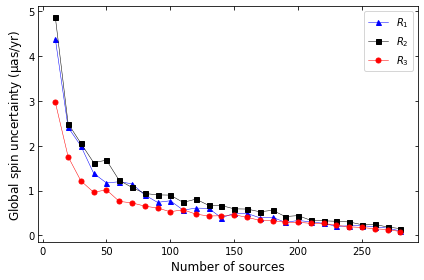

In [3]:
fig, ax = plt.subplots()

ax.plot(spin_tab["num_sou"],
         spin_tab["rx_std"],
         "b-^",
         ms=5,
         lw=0.5,
         label="$R_1$")
ax.plot(spin_tab["num_sou"],
         spin_tab["ry_std"],
         "k-s",
         ms=5,
         lw=0.5,
         label="$R_2$")
ax.plot(spin_tab["num_sou"],
         spin_tab["rz_std"],
         "r-o",
         ms=5,
         lw=0.5,
         label="$R_3$")


ax.set_xlabel("Number of sources", fontsize=12)
ax.set_ylabel("Global spin uncertainty ($\mathrm{\mu as/yr}$)", fontsize=12)

ax.legend(bbox_to_anchor=(1., 1))
plt.tight_layout()

I consider the mean and the standard deviation as the estimate of the VSH parameters and their formal uncertainties, as shown below.

It is shown than when the number of sources exceeds 100, the VSH parameters become stable.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


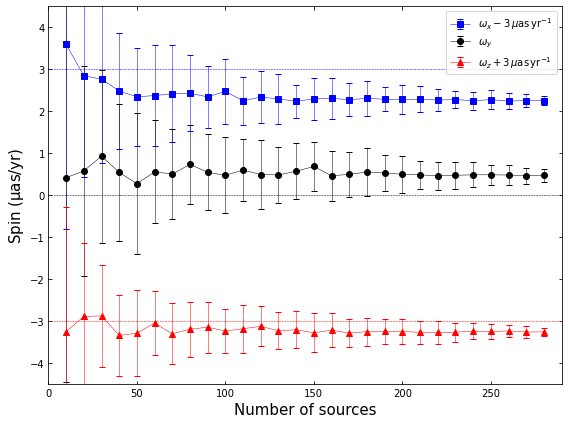

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(3, 0, 1050, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 0, 1050, ls="dashed", color="k", lw=0.5)
ax.hlines(-3, 0, 1050, ls="dashed", color="r", lw=0.5)

ax.errorbar(spin_tab["num_sou"],
             spin_tab["rx_mean"]+3,
             yerr=spin_tab["rx_std"],
             color="blue",
             fmt="-s",
             elinewidth=0.5,
             lw=0.5,
             label="$\\omega_x-3\,\mu$as$\,$yr$^{-1}$",
             capsize=3)
ax.errorbar(spin_tab["num_sou"],
             spin_tab["ry_mean"],
             yerr=spin_tab["ry_std"],
             color="black",
             fmt="-o",
             elinewidth=0.5,
             lw=0.5,
             label="$\\omega_y$",
             capsize=3)
ax.errorbar(spin_tab["num_sou"],
             spin_tab["rz_mean"]-3,
             yerr=spin_tab["rz_std"],
             color="red",
             fmt="-^",
             elinewidth=0.5,
             lw=0.5,
             label="$\\omega_z+3\,\mu$as$\,$yr$^{-1}$",
             capsize=3)


ax.axis([0, 290, -4.5, 4.5])

ax.set_xlabel("Number of sources", fontsize=15)
ax.set_ylabel("Spin ($\mathrm{\mu as/yr}$)", fontsize=15)

ax.legend(loc="upper right")

plt.tight_layout()
plt.savefig("../plots/spin-from-apm.eps")

Another version is to use the median value as the estimate and the 16th and 84th percentiles as the lower and upper limit as the 1-sigma confident level.

Results are the same as shown above.

In [5]:
rx_q1q3 = np.vstack((spin_tab["rx_q2"] - spin_tab["rx_q1"],
                     spin_tab["rx_q3"] - spin_tab["rx_q2"]))
ry_q1q3 = np.vstack((spin_tab["ry_q2"] - spin_tab["ry_q1"],
                     spin_tab["ry_q3"] - spin_tab["ry_q2"]))
rz_q1q3 = np.vstack((spin_tab["rz_q2"] - spin_tab["rz_q1"],
                     spin_tab["rz_q3"] - spin_tab["rz_q2"]))
r_q1q3 = np.vstack((spin_tab["r_q2"] - spin_tab["r_q1"],
                    spin_tab["r_q3"] - spin_tab["r_q2"]))

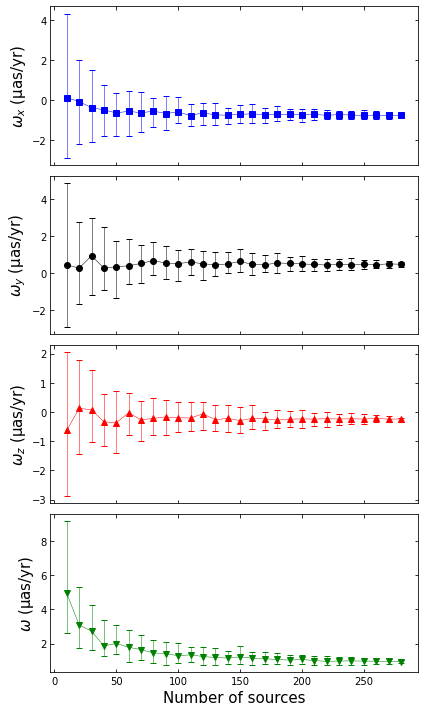

In [6]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(6, 10), nrows=4, sharex=True)

ax0.errorbar(spin_tab["num_sou"],
             spin_tab["rx_q2"],
             yerr=rx_q1q3,
             color="blue",
             fmt="-s",
             elinewidth=0.5,
             lw=0.5,
             label="$R_1$",
             capsize=3)
ax1.errorbar(spin_tab["num_sou"],
             spin_tab["ry_q2"],
             yerr=ry_q1q3,
             color="black",
             fmt="-o",
             elinewidth=0.5,
             lw=0.5,
             label="$R_2$",
             capsize=3)
ax2.errorbar(spin_tab["num_sou"],
             spin_tab["rz_q2"],
             yerr=rz_q1q3,
             color="red",
             fmt="-^",
             elinewidth=0.5,
             lw=0.5,
             label="$R_3$",
             capsize=3)
ax3.errorbar(spin_tab["num_sou"],
             spin_tab["r_q2"],
             yerr=r_q1q3,
             color="green",
             fmt="-v",
             elinewidth=0.5,
             lw=0.5,
             label="$R$",
             capsize=3)

ax3.set_xlabel("Number of sources", fontsize=15)
ax0.set_ylabel("$\\omega_x$ ($\mathrm{\mu as/yr}$)", fontsize=15)
ax1.set_ylabel("$\\omega_y$ ($\mathrm{\mu as/yr}$)", fontsize=15)
ax2.set_ylabel("$\\omega_z$ ($\mathrm{\mu as/yr}$)", fontsize=15)
ax3.set_ylabel("$\\omega$ ($\mathrm{\mu as/yr}$)", fontsize=15)

plt.tight_layout()

As for glide vector, it is significant.

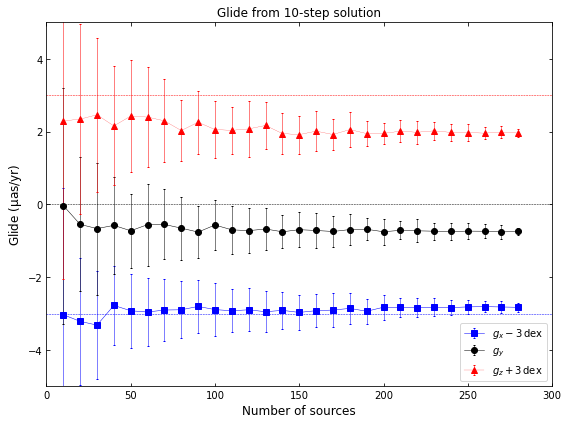

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(3, 0, 1050, ls="dashed", color="r", lw=0.5)
ax.hlines(0, 0, 1050, ls="dashed", color="k", lw=0.5)
ax.hlines(-3, 0, 1050, ls="dashed", color="b", lw=0.5)

ax.errorbar(spin_tab["num_sou"],
             spin_tab["gx_mean"]-3,
             yerr=spin_tab["gx_std"],
             color="blue",
             fmt="-s",
             elinewidth=0.5,
             lw=0.5,
             label="$g_x-3\,\mathrm{dex}$",
             capsize=1)
ax.errorbar(spin_tab["num_sou"],
             spin_tab["gy_mean"],
             yerr=spin_tab["gy_std"],
             color="black",
             fmt="-o",
             elinewidth=0.5,
             lw=0.5,
             label="$g_y$",
             capsize=1)
ax.errorbar(spin_tab["num_sou"],
             spin_tab["gz_mean"]+3,
             yerr=spin_tab["gz_std"],
             color="red",
             fmt="-^",
             elinewidth=0.5,
             lw=0.2,
             label="$g_z+3\,\mathrm{dex}$",
             capsize=1)


ax.axis([0, 300, -5, 5])
ax.set_xlabel("Number of sources", fontsize=12)
ax.set_ylabel("Glide ($\mathrm{\mu as/yr}$)", fontsize=12)

ax.legend(loc="lower right")

plt.title("Glide from 10-step solution", fontsize=12)
plt.tight_layout()

I present the exact values below.

In [8]:
wmean1, wrms1, wstd1 = rms_calc(spin_tab["rx_mean"])
wmean2, wrms2, wstd2 = rms_calc(spin_tab["ry_mean"])
wmean3, wrms3, wstd3 = rms_calc(spin_tab["rz_mean"])

print("============================================")
print("       Mean    RMS    Std")
print("       uas/yr  uas/yr uas/yr")
print("--------------------------------------------")
print("No weighted")
print("R1     {:+4.2f}   {:4.2f}   {:.2f}".format(wmean1, wrms1, wstd1))
print("R2     {:+4.2f}   {:4.2f}   {:.2f}".format(wmean2, wrms2, wstd2))
print("R3     {:+4.2f}   {:4.2f}   {:.2f}".format(wmean3, wrms3, wstd3)) 

wmean1, wrms1, wstd1 = rms_calc(spin_tab["rx_mean"], spin_tab["rx_std"])
wmean2, wrms2, wstd2 = rms_calc(spin_tab["ry_mean"], spin_tab["ry_std"])
wmean3, wrms3, wstd3 = rms_calc(spin_tab["rz_mean"], spin_tab["rz_std"])
print("--------------------------------------------")
print("Weighted")
print("R1     {:+4.2f}   {:4.2f}   {:.2f}".format(wmean1, wrms1, wstd1))
print("R2     {:+4.2f}   {:4.2f}   {:.2f}".format(wmean2, wrms2, wstd2))
print("R3     {:+4.2f}   {:4.2f}   {:.2f}".format(wmean3, wrms3, wstd3))
print("--------------------------------------------")

       Mean    RMS    Std
       uas/yr  uas/yr uas/yr
--------------------------------------------
No weighted
R1     -0.60   0.67   0.28
R2     +0.53   0.55   0.11
R3     -0.20   0.24   0.11
--------------------------------------------
Weighted
R1     -0.73   0.73   0.04
R2     +0.49   0.49   0.04
R3     -0.24   0.24   0.03
--------------------------------------------


The apex of the spin vector is also listed below.

In [9]:
R = np.array([wmean1, wmean2, wmean3])
R_err = np.array([wstd1, wstd2, wstd3])
r, RAdeg, DCdeg, r_err, RAdeg_err, DCdeg_err = glide_apex_calc(R, R_err)

print("The amplitude of rotation is {:.2f} +/- {:.2f} dex, "
      "apex of ({:.0f} +/- {:.0f}, "
      "{:.0f} +/- {:.0f}) deg.".format(
          r, r_err, 
          RAdeg, RAdeg_err, 
          DCdeg, DCdeg_err))

The amplitude of rotation is 0.91 +/- 0.04 dex, apex of (146 +/- 3, -15 +/- 2) deg.


In [10]:
wmean1, wrms1, wstd1 = rms_calc(spin_tab["gx_mean"])
wmean2, wrms2, wstd2 = rms_calc(spin_tab["gy_mean"])
wmean3, wrms3, wstd3 = rms_calc(spin_tab["gz_mean"])

print("============================================")
print("       Mean    RMS    Std")
print("       uas/yr  uas/yr uas/yr")
print("--------------------------------------------")
print("No weighted")
print("G1     {:+4.2f}   {:4.2f}   {:.2f}".format(wmean1, wrms1, wstd1))
print("G2     {:+4.2f}   {:4.2f}   {:.2f}".format(wmean2, wrms2, wstd2))
print("G3     {:+4.2f}   {:4.2f}   {:.2f}".format(wmean3, wrms3, wstd3)) 

wmean1, wrms1, wstd1 = rms_calc(spin_tab["gx_mean"], spin_tab["gx_std"])
wmean2, wrms2, wstd2 = rms_calc(spin_tab["gy_mean"], spin_tab["gy_std"])
wmean3, wrms3, wstd3 = rms_calc(spin_tab["gz_mean"], spin_tab["gz_std"])
print("--------------------------------------------")
print("Weighted")
print("G1     {:+4.2f}   {:4.2f}   {:.2f}".format(wmean1, wrms1, wstd1))
print("G2     {:+4.2f}   {:4.2f}   {:.2f}".format(wmean2, wrms2, wstd2))
print("G3     {:+4.2f}   {:4.2f}   {:.2f}".format(wmean3, wrms3, wstd3)) 
print("--------------------------------------------")

       Mean    RMS    Std
       uas/yr  uas/yr uas/yr
--------------------------------------------
No weighted
G1     +0.09   0.15   0.12
G2     -0.67   0.69   0.14
G3     -0.91   0.94   0.17
--------------------------------------------
Weighted
G1     +0.16   0.16   0.04
G2     -0.73   0.73   0.03
G3     -1.02   1.02   0.05
--------------------------------------------


The apex of the glide vector is also listed below.

In [11]:
G = np.array([wmean1, wmean2, wmean3])
G_err = np.array([wstd1, wstd2, wstd3])
r, RAdeg, DCdeg, r_err, RAdeg_err, DCdeg_err = glide_apex_calc(G, G_err)

print("The amplitude of    glide is {:.2f} +/- {:.2f} dex, "
      "apex of ({:.0f} +/- {:.0f}, "
      "{:.0f} +/- {:.0f}) deg.".format(
          r, r_err, 
          RAdeg, RAdeg_err, 
          DCdeg, DCdeg_err))

The amplitude of    glide is 1.27 +/- 0.04 dex, apex of (282 +/- 3, -54 +/- 2) deg.
